In [3]:
# First, we need to import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Next, we will read in the advertising data and store it in a DataFrame
advertising = pd.read_csv("advertising.csv")
advertising.head()


,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9


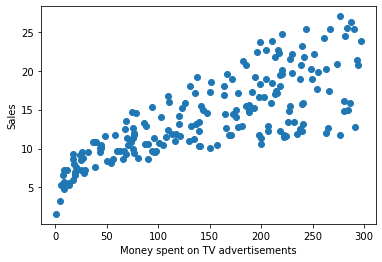

In [4]:
# Question 1a: Scatter plot of money spent on TV advertisements vs sales
plt.scatter(advertising["TV"], advertising["Sales"])
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

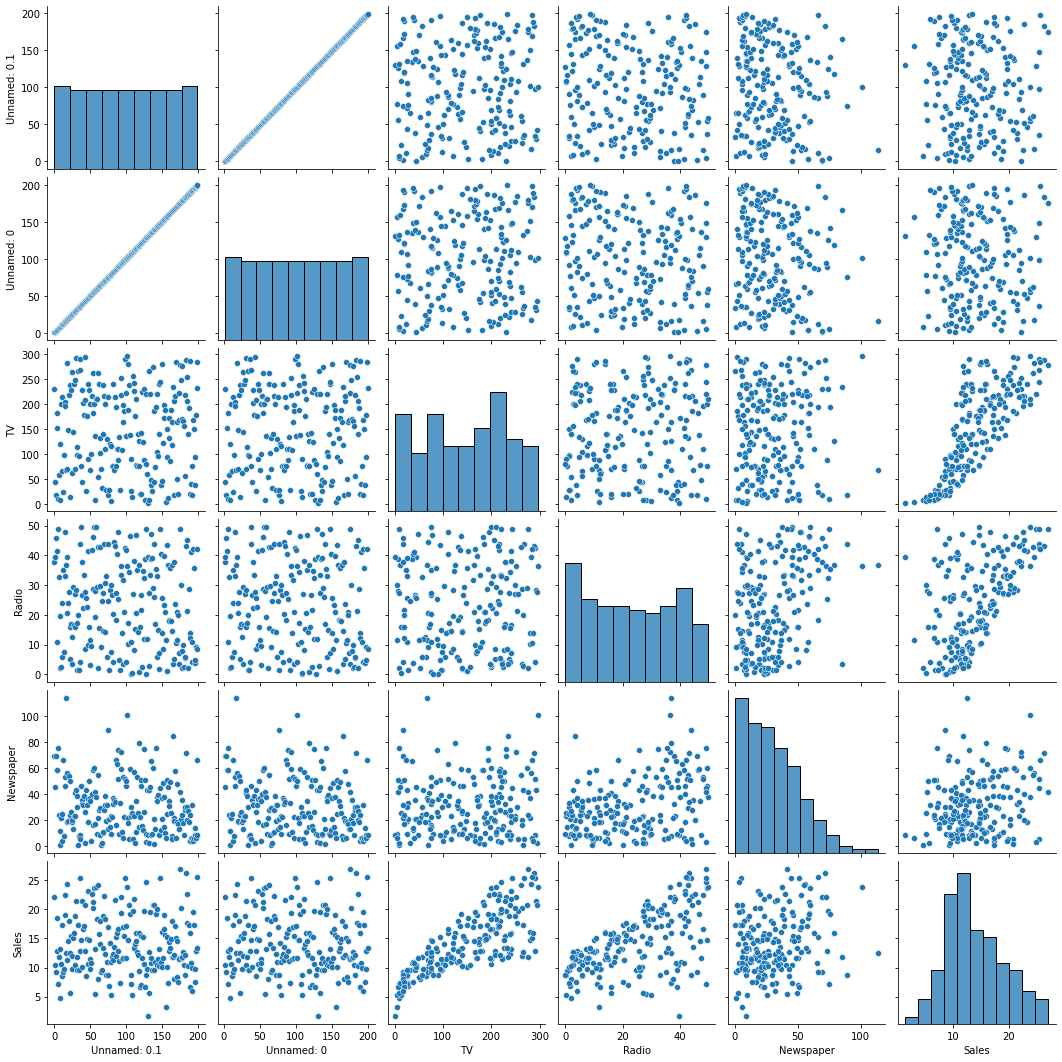

In [5]:
# Question 1b: Pair plots and heatmap
sns.pairplot(advertising)
plt.show()

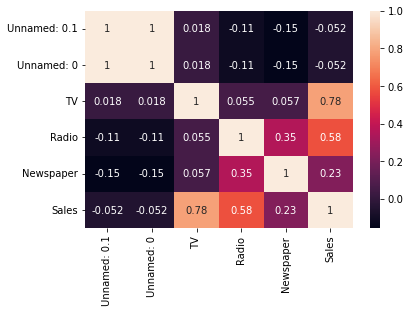

In [6]:
# Heatmap
sns.heatmap(advertising.corr(), annot=True)
plt.show()

In [7]:
# Question 2: Linear regression model based on money spent on TV advertisements vs sales
X = advertising["TV"]
y = advertising["Sales"]

# We add a constant to the model to allow for the intercept term
X = sm.add_constant(X)

# We fit the model using OLS
model = sm.OLS(y, X).fit()

In [8]:
# Question 3: Predict the sales based on the money spent on TV advertisements
predictions = model.predict(X)

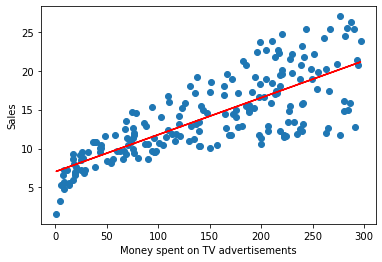

In [9]:
# Question 4: Draw the regression line superimposed on the data
plt.scatter(advertising["TV"], advertising["Sales"])
plt.plot(advertising["TV"], predictions, color="red")
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

In [10]:
# Question 5: Use statsmodels.api to run an OLS regressor on the data and plot the line of regression and residuals
model = sm.OLS(y, X)
results = model.fit()

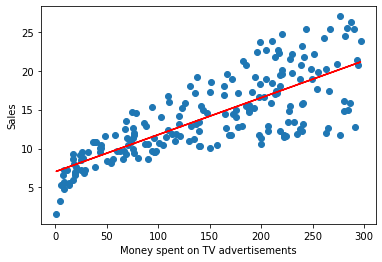

In [11]:
# Plot the line of regression
plt.scatter(advertising["TV"], advertising["Sales"])
plt.plot(advertising["TV"], results.predict(X), color="red")
plt.xlabel("Money spent on TV advertisements")
plt.ylabel("Sales")
plt.show()

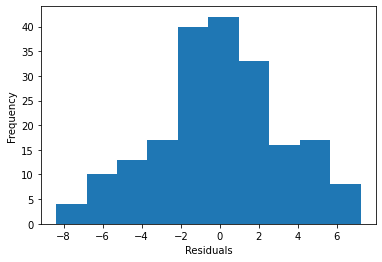

In [12]:
# Plot the residuals
residuals = y - results.predict(X)
plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Comment on the heteroscedasticity
if abs(residuals).mean() > 0.5:
    print("There may be heteroscedasticity in the data. It is worth investigating further.")
else:
    print("There does not appear to be heteroscedasticity in the data.")

There may be heteroscedasticity in the data. It is worth investigating further.
